## Predicting Heart-Disease using Machine Learning 


-We're are building the machine learning model to predict the heart-disease of patient from the medical attributes.

In [1]:
# import the analysis libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the datasets 

hd = pd.read_csv('data/heart-disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Details of Datasets

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

## Data Explorations (EDA or Explotarotry Data Analysis)

In [3]:
hd.shape

(303, 14)

In [4]:
#check the dtypes
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#count the value of target

hd['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

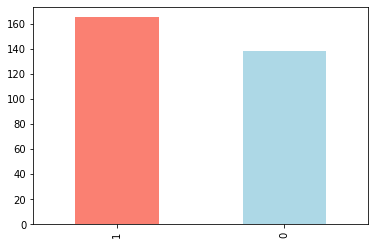

In [8]:
#plot the target by using the matplotlib

hd['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

## Heart Disease according to sex |

In [9]:
hd['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#compare the target and sex columns

pd.crosstab(hd.target, hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

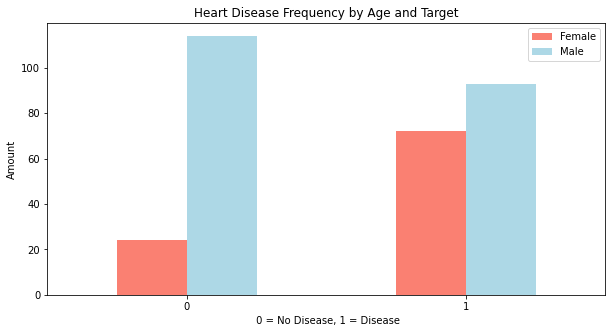

In [11]:
#plot the crosstab data 

pd.crosstab(hd.target, hd.sex).plot(kind='bar',
                                   figsize=(10,5),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency by Age and Target')
plt.xlabel(' 0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

## Heart Disease Frequency according to Heart Rate

In [12]:
hd.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [13]:
#compare by crosstab

pd.crosstab(hd.cp, hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


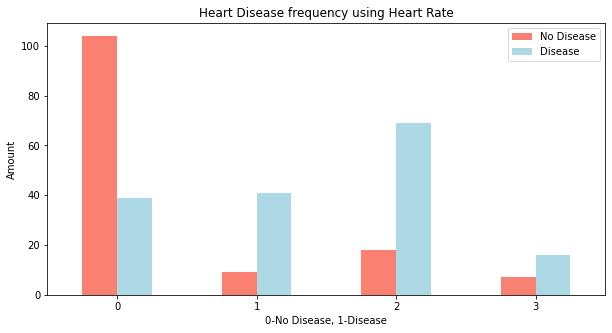

In [14]:
#plot the data 

pd.crosstab(hd.cp, hd.target).plot(kind='bar',
                                  figsize=(10,5),
                                  color=(['salmon', 'lightblue']))

#add details 

plt.title('Heart Disease frequency using Heart Rate')
plt.xlabel('0-No Disease, 1-Disease')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

## Age vs Max Rate for Heart Disease

In [15]:
hd.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [16]:
#compare the by crosstab 
pd.crosstab(hd.thalach, hd.target)

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


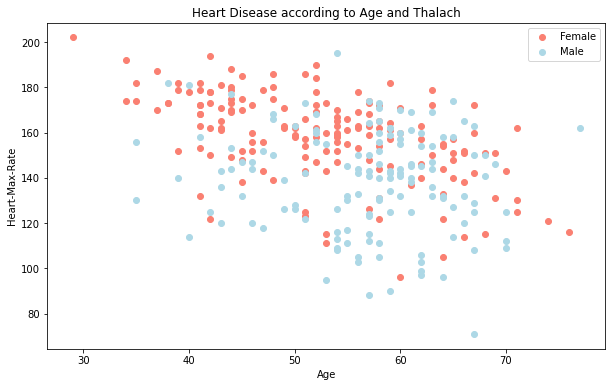

In [17]:
plt.subplots(figsize=(10,6))

#create a plot for the positive examples 
plt.scatter(hd.age[hd.target==1],
            hd.thalach[hd.target==1],
            color=['salmon'])

#create a plot for the negative examples
plt.scatter(hd.age[hd.target==0],
            hd.thalach[hd.target==0],
            color=['lightblue'])

#add the details 
plt.title('Heart Disease according to Age and Thalach')
plt.xlabel('Age')
plt.ylabel('Heart-Max-Rate')
plt.legend(['Female', 'Male'])

## Make a Corrrealtion Matrix



In [18]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Plot the correlation Matrix

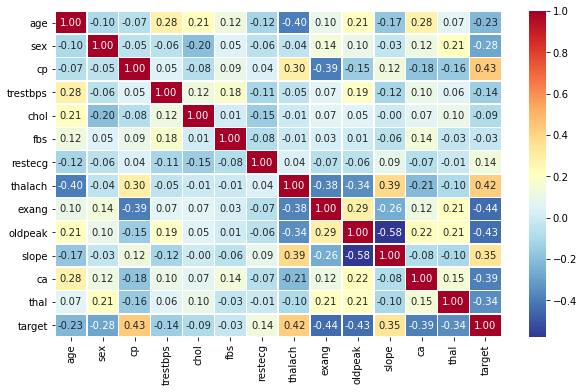

In [19]:
corr_matrix = hd.corr()

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt='.2f',
                 cmap='RdYlBu_r')

## Modelling 

In [20]:
#train and split data 

from sklearn.model_selection import train_test_split

#create data 
X = hd.drop('target', axis=1)
y = hd['target']

#split data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Build a Machine Learning model to get a 95% Accuracy

In [22]:
from sklearn.linear_model import LogisticRegression

#create a random seed
np.random.seed()

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\harsh a. pimpalkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.score(X_test, y_test)

0.8524590163934426

In [24]:
#let's build another machine learning model to get the accuracy
#let's use K-NN

from sklearn.neighbors import KNeighborsClassifier

modelk = KNeighborsClassifier()
modelk.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
modelk.score(X_test, y_test)

0.6721311475409836

In [26]:
## let's build again anothor model to get the accuracy
#let's use the RandomForestCLassifier

from sklearn.ensemble import RandomForestClassifier

modelr = RandomForestClassifier()
modelr.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
model.score(X_test, y_test)

0.8524590163934426

In [28]:
#let's get all scores all together 

model_scores = {f'Logistic Regression:{model.score(X_test, y_test)*100:.2f}%',
               f'K-NN:{modelk.score(X_test, y_test)*100:.2f}%',
               f'RandForestClassifier:{modelr.score(X_test, y_test)*100:.2f}%' }
 
model_scores                

{'K-NN:67.21%', 'Logistic Regression:85.25%', 'RandForestClassifier:80.33%'}

## Hyperparameter Tunning With RandomizedSearchCV


we're tunning to get the accuracy

- Logistic Regression
- RandomForestClassifier

by using RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV

#create a hyperparameter grid fro logistic Regression

rs_grid = {'C' : np.logspace(-4, 4, 20),
               "solver": ['liblinear']}


#create a hyperparameter grid for the RandomForestClassifier

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth": [None, 3,5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [30]:
#tune logistice Regression

np.random.seed(42)

rs_log_leg =RandomizedSearchCV(LogisticRegression(),
                               param_distributions=rs_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#tune RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_log_leg.fit(X_train, y_train)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_log_leg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [32]:
rs_log_leg.score(X_test, y_test)

0.8524590163934426

In [33]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': 5}

In [34]:
rs_rf.score(X_test, y_test)

0.8032786885245902

In [35]:
rs_log_leg.score(X_test, y_test)

0.8524590163934426

## Hypermeter Tunning with GridSearchCV 

-to get 95% accuracy

In [36]:
from sklearn.model_selection import GridSearchCV

#tune the logistic Regression

rs_gs = { 'C' : np.logspace(-4, 4, 30),
         "solver" : ['liblinear']}

#Setup the hyperparameter for the logistic Regression model

rs_rl = GridSearchCV(LogisticRegression(),
                     param_grid=rs_gs,
                     cv=5,
                     verbose=True)

In [37]:
rs_rl.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

# Accuracy 

In [89]:
Accuracy = {f"LogisticRegression: {model.score(X_test, y_test)*100:.2f}%",
            f"RandSearchCV-LogisticRegression: {rs_log_leg.score(X_test, y_test)*100:.2f}%",
            f"GridSerachCV-LogisticRegression: {rs_rl.score(X_test, y_test)*100:.2f}%"}
            
Accuracy    

{'GridSerachCV-LogisticRegression: 85.25%',
 'LogisticRegression: 85.25%',
 'RandSearchCV-LogisticRegression: 85.25%'}

## Evaluting our tuned Machine Learning Classifier, beyond Accuracy

- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1-Score

In [40]:
#make predictions on tuned model

y_preds = rs_log_leg.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [41]:
y_test

102    1
82     1
23     1
13     1
246    0
      ..
84     1
219    0
202    0
287    0
28     1
Name: target, Length: 61, dtype: int64

## Confusion Matrix

- Confusion matrix shows the each combination of the true and predicted classes.

In [43]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[19  4]
 [ 5 33]]


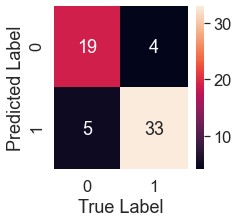

In [44]:
## plot the confusion matrix 

sns.set(font_scale = 1.5)

def conf_mat_plot(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    
conf_mat_plot(y_test, y_preds)    
    

## Classification Report 

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.89      0.87      0.88        38

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.85      0.85        61



In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [48]:
## Check the hyperparameters

rs_log_leg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [49]:
clf = LogisticRegression(C = 0.615848211066026,
                        solver = 'liblinear')

In [50]:
## Cross-validated accuracy 

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

cv_accuracy = np.mean(cv_acc)
cv_accuracy

0.8249180327868852

In [52]:
## Cross Validated Precision 

cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='precision')

cv_Precision = np.mean(cv_precision)
cv_Precision

0.8122549019607843

In [54]:
## Cross Validated Recall

cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring='recall')

cv_Recall = np.mean(cv_recall)
cv_Recall

0.890909090909091

In [56]:
## Cross validated f1_score

cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='f1')

cv_f1_score = np.mean(cv_f1)
cv_f1_score

0.8481221874318333

## Plot the Cross-Validated Score

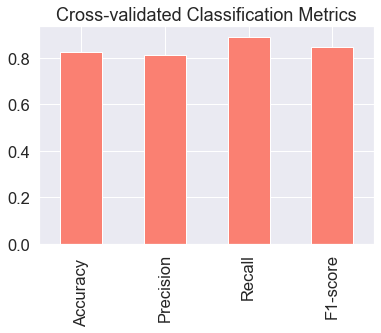

In [62]:
cv_metrics = pd.DataFrame({'Accuracy ': cv_accuracy,
                          'Precision': cv_Precision,
                          'Recall': cv_Recall,
                          'F1-score': cv_f1_score},
                         index=[0])

cv_metrics.T.plot(kind='bar', color='salmon', legend=False, title='Cross-validated Classification Metrics');


## Feature Importance 


- Features importance means which features contributed most to the outcomes of teh model and how they contribute.

In [63]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
#fit an instance of Logistic-Regression

rs_log_leg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [66]:
clf = LogisticRegression(C =0.615848211066026,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [68]:
# Check Coef...

clf.coef_

array([[-0.00387612, -1.24392494,  0.74627928, -0.00871343, -0.00295391,
        -0.44776186,  0.17557128,  0.02996922, -0.83305968, -0.44532312,
         0.54881914, -0.68879985, -0.8806281 ]])

In [69]:
#Match coef's of Features to columns

feature_dict = dict(zip(hd.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.0038761220661251185,
 'sex': -1.243924939420598,
 'cp': 0.7462792796014328,
 'trestbps': -0.008713431497522132,
 'chol': -0.0029539149245344227,
 'fbs': -0.44776185660224466,
 'restecg': 0.17557128468003316,
 'thalach': 0.02996921641750795,
 'exang': -0.8330596848885895,
 'oldpeak': -0.4453231162579147,
 'slope': 0.5488191418789115,
 'ca': -0.6887998549948704,
 'thal': -0.8806280997052587}

<AxesSubplot:title={'center':'Feature Importance'}>

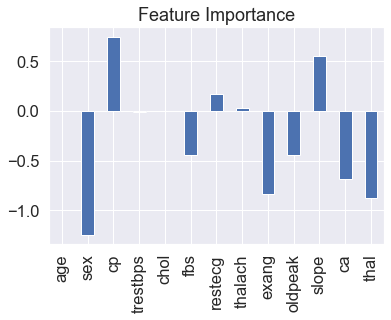

In [70]:
## Visvalise feature importance 

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)